<a href="https://colab.research.google.com/github/Mariamajib/Diabetes-Prediction/blob/main/Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION OF DIABETES USING DECISION TREE**


# Introduction
The prevalence of diabetes is increasing globally. Diabetes is a significant public health concern due to its associated health complications and economic burden on individuals, families, and healthcare systems. As a result, there is a growing need for data-driven approaches to diabetes prevention, early detection, and management. 

Diabetes is a chronic metabolic disorder characterized by high blood glucose levels resulting from defects in insulin secretion, insulin action, or both. Insulin is a hormone produced by the pancreas that regulates blood glucose levels by facilitating the uptake of glucose from the blood into cells for energy production or storage. In individuals with diabetes, the body either does not produce enough insulin or cannot effectively use the insulin produced, resulting in high blood glucose levels, which can lead to various complications, such as damage to the kidneys, nerves, eyes, and blood vessels.


# **DATA PREPARATION**
The following Libraries are implemented in the project
1. **Pandas**- used for data manipulation and analysis 
2. **Numpy**- used for N-dimensional arrays, matrices and linear algebra 
3. **Seaborn**- used for data visualization
4. **Matplotlib**- used for data visualization
5. **Scikit Learn**- used for machine learning algorithms

In [1]:
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

# Overview of the dataset
The dataset used for this project was from Gihthub. This dataset is used to predict how likely a patient has diabetes or not based on the input parameters like Pregnancies, Glucose, Blood pressure, Insulin, Body mass index, etc. All patients used in this data are at least 21 years old.

**Features of the dataset**:

The dataset contains 2000 individuals data with 9 features set. The detailed description of all the features are as follows:

**Pregnancies**: indicates the number of pregnancies

**Glucose**: indicates the plasma glucose concentration

**Blood Pressure**: indicates diastolic blood pressure in mm/Hg

**Skin Thickness**: indicates triceps skinfold thickness in mm

**Insulin**: indicates insulin in U/mL

**BMI**: indicates the body mass index in kg/m2

**Diabetes Pedigree Function**: indicates the function which scores likelihood of diabetes based on family history

**Age**: indicates the age of the person

**Outcome**: indicates if the patient had a diabetes or not (1 = yes, 0 = no)

The pandas **read_csv()** function is used to read comma-separated values (csv) file by retrieving the data in form of DataFrame.

In [2]:
#read the dataset
datasets = pd.read_csv("https://raw.githubusercontent.com/MrKhan0747/Diabetes-Prediction/master/diabetes.csv")
datasets

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


The **head()** method displays the first numbers of rows in the DataFrame.



In [3]:
#check the first 20 rows in the dataset
datasets.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


The **shape** function shows the dimensions (rows, columns).

In [4]:
#check the dimension of the dataset
datasets.shape

(2000, 9)

The **info()** method prints the information of the DataFrame which includes the  number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [5]:
#print the information of the DataFrame
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


The function of **dtypes** is to show the types of data in each columns(integer, bool, float, string, python object, etc.).

In [6]:
#check the data type of the dataset
datasets.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The **describe()** method shows the description of data in the DataFrame.

In [7]:
#describe the dataset
datasets.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


The **isnull()** method is used to detect missing values in an array-like object. It returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values, and otherwise False. 

In [8]:
#check for missing values
datasets.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False


The **isnull().sum()** method is used to display the sum of all missing values in each columns.

In [9]:
#check for the sum of all missing values in each columns
datasets.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

The **drop_duplicates()** method is used to remove duplicate rows in the dataset.

In [10]:
#drop duplicate rows in the dataset
duplicate_datasets = datasets.drop_duplicates()
duplicate_datasets 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1564,1,100,62,0,0,64.4,0.152,36,0
1565,0,163,40,23,64,40.7,0.322,33,0
1566,6,139,84,37,0,50.7,0.320,50,1
1567,2,167,44,30,140,52.7,0.452,28,0


The **drop_duplicates('DiabetesPedigreeFunction')** method is used to remove duplicates in the **DiabetesPedigreeFunction** column.

In [11]:
#drop duplicates in the DiabetesPedigreeFunction column
duplicate_datasets = datasets.drop_duplicates('DiabetesPedigreeFunction')
duplicate_datasets 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1561,0,116,64,39,225,40.2,0.720,50,0
1562,2,142,94,59,177,38.3,0.620,63,1
1564,1,100,62,0,0,64.4,0.152,36,0
1565,0,163,40,23,64,40.7,0.322,33,0


The **fillna()** method replaces the NULL values with a specified value.

In [12]:
#replace the NULL values in the Preganacies column with zero 
datasets['Pregnancies'] = datasets['Pregnancies'].fillna(0)
datasets['Pregnancies']

0       2
1       0
2       0
3       0
4       1
       ..
1995    2
1996    8
1997    6
1998    0
1999    2
Name: Pregnancies, Length: 2000, dtype: int64

The **fillna()** method replaces the NULL values with a specified value.

In [13]:
#replace the NULL values in the Age column with the mode of Age in the dataset
datasets['Age'] = datasets['Age'].fillna(datasets['Age'].mode())
datasets['Age']

0       47
1       23
2       31
3       24
4       21
        ..
1995    33
1996    36
1997    42
1998    26
1999    25
Name: Age, Length: 2000, dtype: int64

The **fillna()** method replaces the NULL values with a specified value.

In [14]:
#replace the NULL values in the Glucose column with the mean of Glucose in the dataset
datasets['Glucose'] = datasets['Glucose'].fillna(datasets['Glucose'].mean())
datasets['Glucose']

0       138
1        84
2       145
3       135
4       139
       ... 
1995     75
1996    179
1997     85
1998    129
1999     81
Name: Glucose, Length: 2000, dtype: int64

The **sort_values()** method sorts a data frame in ascending or descending order of the column passed.

In [15]:
#sort the Age column in ascending order
datasets.sort_values(by=['Age'], ascending=[True])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
421,2,94,68,18,76,26.0,0.561,21,0
1378,0,177,60,29,478,34.6,1.072,21,1
1801,0,134,58,20,291,26.4,0.352,21,0
1366,1,96,64,27,87,33.2,0.289,21,0
354,3,90,78,0,0,42.7,0.559,21,0
...,...,...,...,...,...,...,...,...,...
923,2,119,0,0,0,19.6,0.832,72,0
1512,2,119,0,0,0,19.6,0.832,72,0
929,9,134,74,33,60,25.9,0.460,81,0
1518,9,134,74,33,60,25.9,0.460,81,0


The **sort_values()** method sorts a data frame in ascending or descending order of the column passed.

In [16]:
#sort the Pregnancies column in descending order
datasets.sort_values(by=['Pregnancies'], ascending=[False])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1
1980,17,163,72,41,114,40.9,0.817,47,1
1317,17,163,72,41,114,40.9,0.817,47,1
88,15,136,70,32,110,37.1,0.153,43,1
1909,15,136,70,32,110,37.1,0.153,43,1
...,...,...,...,...,...,...,...,...,...
1719,0,102,78,40,90,34.5,0.238,24,0
440,0,189,104,25,0,34.3,0.435,41,1
1411,0,86,68,32,0,35.8,0.238,25,0
1715,0,132,78,0,0,32.4,0.393,21,0


The **sort_values()** method sorts a data frame in ascending or descending order of the column passed.

In [17]:
#sort the Outcome column in ascending order
datasets.sort_values(by=['Outcome'], ascending=[True])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1999,2,81,72,15,76,30.1,0.547,25,0
1673,1,119,88,41,170,45.3,0.507,26,0
962,4,99,68,38,0,32.8,0.145,33,0
961,2,89,90,30,0,33.5,0.292,42,0
960,2,83,65,28,66,36.8,0.629,24,0
...,...,...,...,...,...,...,...,...,...
1055,1,173,74,0,0,36.8,0.088,38,1
1060,7,150,78,29,126,35.2,0.692,54,1
1061,4,183,0,0,0,28.4,0.212,36,1
954,0,145,0,0,0,44.2,0.630,31,1


The **iterrows()** method generates an iterator object of the DataFrame, allowing us to iterate each row in the DataFrame.

In [18]:
#print the first 40 rows of Glucose and Outcome
for i,row in datasets.iterrows():
  if i > 40:
    break
  print(row['Glucose'],row['Outcome'])  

138.0 1.0
84.0 0.0
145.0 1.0
135.0 1.0
139.0 0.0
173.0 0.0
99.0 0.0
194.0 0.0
83.0 0.0
89.0 0.0
99.0 0.0
125.0 1.0
80.0 0.0
166.0 0.0
110.0 0.0
81.0 0.0
195.0 1.0
154.0 0.0
117.0 0.0
84.0 0.0
0.0 1.0
94.0 0.0
96.0 0.0
75.0 0.0
180.0 1.0
130.0 0.0
84.0 0.0
120.0 0.0
84.0 1.0
139.0 0.0
91.0 0.0
91.0 0.0
99.0 0.0
163.0 1.0
122.0 0.0
103.0 0.0
138.0 0.0
102.0 1.0
90.0 1.0
111.0 1.0
180.0 0.0


The **rename()** method is used to rename a file or a directory.

In [19]:
#rename the 'BMI' and 'Outcome' colunn labels 
new_names={'BMI':'BodyMassIndex', 'Outcome':'DiabetesOutcomes'}
datasets.rename(columns=new_names, inplace = True)
datasets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabetesPedigreeFunction,Age,DiabetesOutcomes
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


Display only the **'Pregnancies'** and **'DiabetesOutcomes'** columns.

In [20]:
#print the pregancies and diabetesoutcomes columns 
list = ['Pregnancies', 'DiabetesOutcomes']
datasets[list]

,Pregnancies,DiabetesOutcomes
0,2,1
1,0,0
2,0,1
3,0,1
4,1,0
...,...,...
1995,2,0
1996,8,1
1997,6,0
1998,0,1


Display only the **'Glucose'** and **'DiabetesOutcomes'** columns.

In [21]:
#print the glucose and diabetesoutcomes columns
datasets[['Glucose', 'DiabetesOutcomes']]

,Glucose,DiabetesOutcomes
0,138,1
1,84,0
2,145,1
3,135,1
4,139,0
...,...,...
1995,75,0
1996,179,1
1997,85,0
1998,129,1


Display only the **'BloodPressure'** and **'DiabetesOutcomes'** columns.

In [22]:
#print the blood pressure and diabetesoutcomes columns
datasets[['BloodPressure', 'DiabetesOutcomes']]

,BloodPressure,DiabetesOutcomes
0,62,1
1,82,0
2,0,1
3,68,1
4,62,0
...,...,...
1995,64,0
1996,72,1
1997,78,0
1998,110,1


Display only the **'SkinThickness'** and **'DiabetesOutcomes'** columns.

In [23]:
#print the skin thickness and diabetesoutcomes columns
datasets[['SkinThickness', 'DiabetesOutcomes']]

,SkinThickness,DiabetesOutcomes
0,35,1
1,31,0
2,0,1
3,42,1
4,41,0
...,...,...
1995,24,0
1996,42,1
1997,0,0
1998,46,1


Display only the **'Insulin'** and **'DiabetesOutcomes'** columns.

In [24]:
#print the insulin and diabetesoutcomes columns
datasets[['Insulin', 'DiabetesOutcomes']]

,Insulin,DiabetesOutcomes
0,0,1
1,125,0
2,0,1
3,250,1
4,480,0
...,...,...
1995,55,0
1996,130,1
1997,0,0
1998,130,1


Display only the **'BodyMassIndex'** and **'DiabetesOutcomes'** columns.

In [25]:
#print the body mass index and diabetesoutcomes columns
datasets[['BodyMassIndex', 'DiabetesOutcomes']]

,BodyMassIndex,DiabetesOutcomes
0,33.6,1
1,38.2,0
2,44.2,1
3,42.3,1
4,40.7,0
...,...,...
1995,29.7,0
1996,32.7,1
1997,31.2,0
1998,67.1,1


Display only the **'DiabetesPedigreeFunction'** and **'DiabetesOutcomes'** columns.

In [26]:
#print the diabetes pedigree function and diabetesoutcomes columns
datasets[['DiabetesPedigreeFunction', 'DiabetesOutcomes']]

,DiabetesPedigreeFunction,DiabetesOutcomes
0,0.127,1
1,0.233,0
2,0.630,1
3,0.365,1
4,0.536,0
...,...,...
1995,0.370,0
1996,0.719,1
1997,0.382,0
1998,0.319,1


Display only the **'Age'** and **'DiabetesOutcomes'** columns.

In [27]:
#print the age and diabetesoutcomes columns
datasets[['Age', 'DiabetesOutcomes']]

,Age,DiabetesOutcomes
0,47,1
1,23,0
2,31,1
3,24,1
4,21,0
...,...,...
1995,33,0
1996,36,1
1997,42,0
1998,26,1


The **iloc[]** method is used to select a specific row or column from the data set by retrieving any particular value from a row or column by using index values.

In [28]:
#display the information in row 555
datasets.iloc[555]

Pregnancies                   7.000
Glucose                     124.000
BloodPressure                70.000
SkinThickness                33.000
Insulin                     215.000
BodyMassIndex                25.500
DiabetesPedigreeFunction      0.161
Age                          37.000
DiabetesOutcomes              0.000
Name: 555, dtype: float64

The **value_counts()** method returns the counts of unique values of an object.

In [29]:
#print the counts of 0s and 1s in diabetes outcomes 
datasets['DiabetesOutcomes'].value_counts()

0    1316
1     684
Name: DiabetesOutcomes, dtype: int64

# **DATA VISUALIZATION**

A **heatmap** is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colours. It shows the relationship and correlations between two variables, one plotted on each axis.

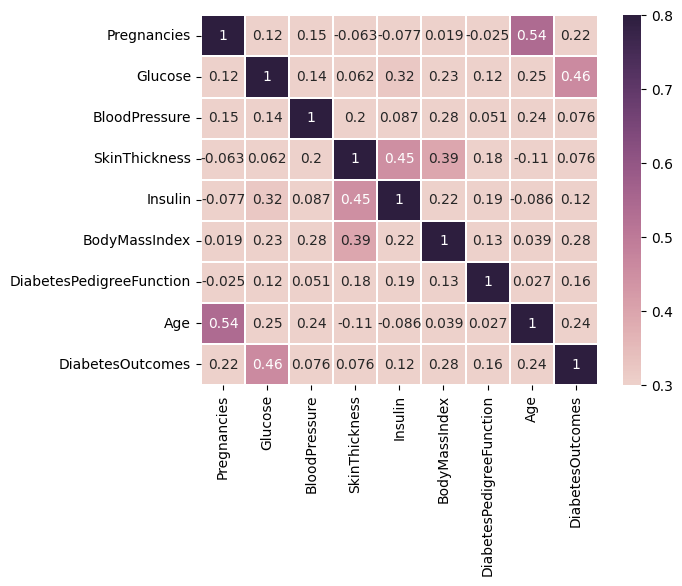

In [30]:
l = ['Pregnancies', 'Glucose', 'BloodPressure' ,	'SkinThickness' ,	'Insulin' ,	'BodyMassIndex', 'DiabetesPedigreeFunction' ,	'Age', 'DiabetesOutcomes']
sns.heatmap(datasets[l].corr(), vmin=0.3, vmax=0.8, cmap= sns.cubehelix_palette(as_cmap=True), linewidths=0.2, annot=True);

An **Histogram** is used for quantitative data. It is bar graph that shows "how often" or number of observations within each given interval in a distribution.  


The **figsize** is used to change the size of the graph in terms of height and width

The **hist()** funtion is used to plot the histogram with parameters passed

The **xlabel()** function is used to label the x axis

The **ylabel()** function is used to label the y axis

The **title()** function is used to add title to the graph

The **show()** function display the graph

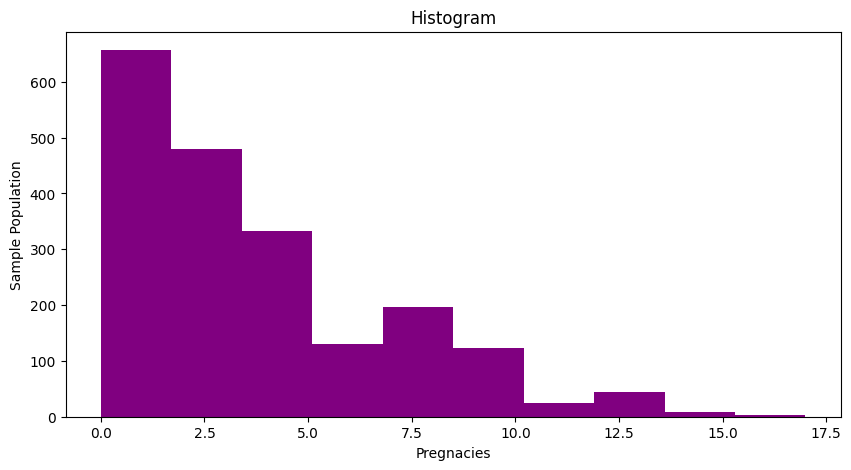

In [31]:
#plot the relationship between pregnancies and sample population
plt.figure(figsize= (10, 5))
plt.hist(datasets['Pregnancies'], color= 'purple')
plt.xlabel("Pregnacies")
plt.ylabel("Sample Population")
plt.title("Histogram")
plt.show()

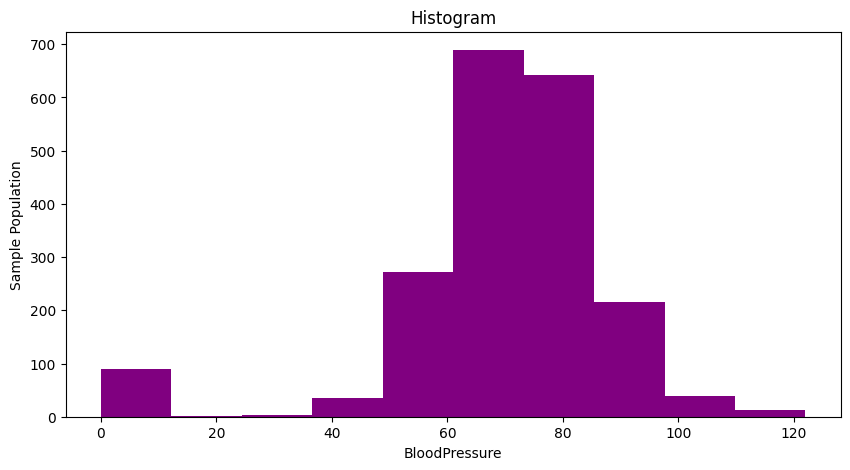

In [32]:
#plot the relationship between blood pressure and sample population
plt.figure(figsize= (10, 5))
plt.hist(datasets['BloodPressure'], color= 'purple')
plt.xlabel("BloodPressure")
plt.ylabel("Sample Population")
plt.title("Histogram")
plt.show()

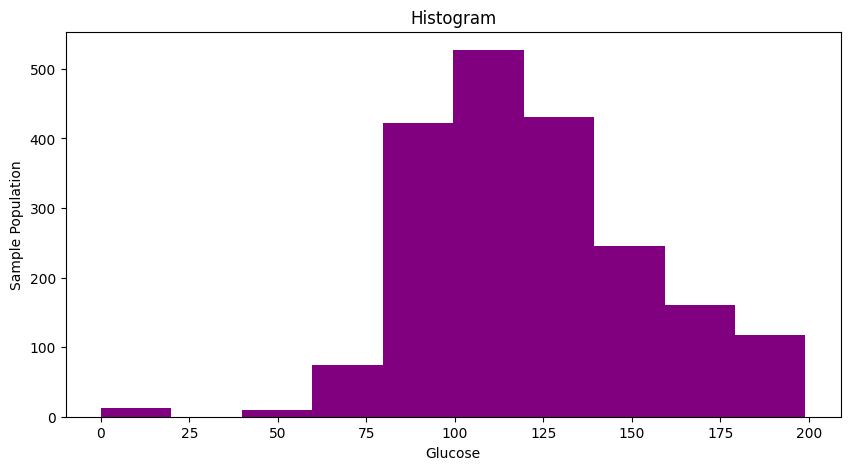

In [33]:
#plot the relationship between glucose and sample population
plt.figure(figsize= (10, 5))
plt.hist(datasets['Glucose'], color= 'purple')
plt.xlabel("Glucose")
plt.ylabel("Sample Population")
plt.title("Histogram")
plt.show()

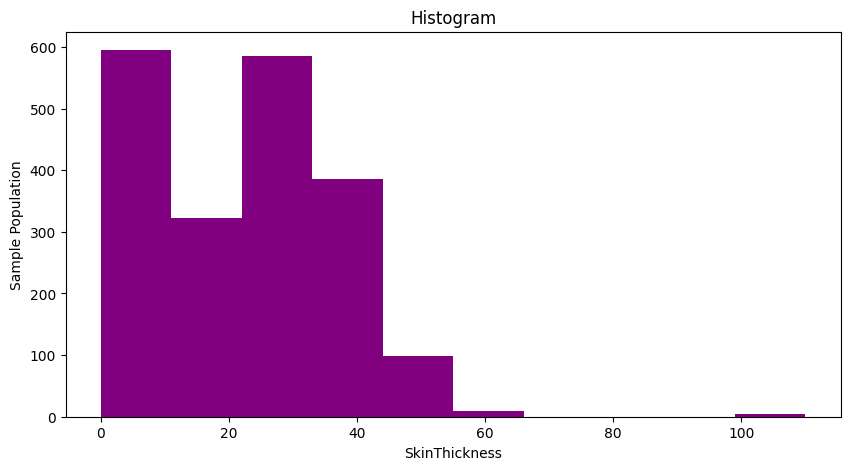

In [34]:
#plot the relationship between skin thickness and sample population
plt.figure(figsize= (10, 5))
plt.hist(datasets['SkinThickness'], color= 'purple')
plt.xlabel("SkinThickness")
plt.ylabel("Sample Population")
plt.title("Histogram")
plt.show()

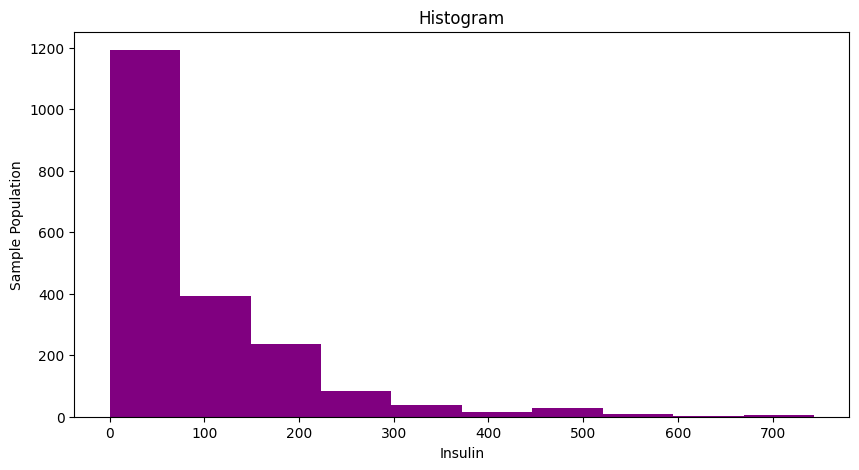

In [35]:
#plot the relationship between insulin and sample population
plt.figure(figsize= (10, 5))
plt.hist(datasets['Insulin'], color= 'purple')
plt.xlabel("Insulin")
plt.ylabel("Sample Population")
plt.title("Histogram")
plt.show()

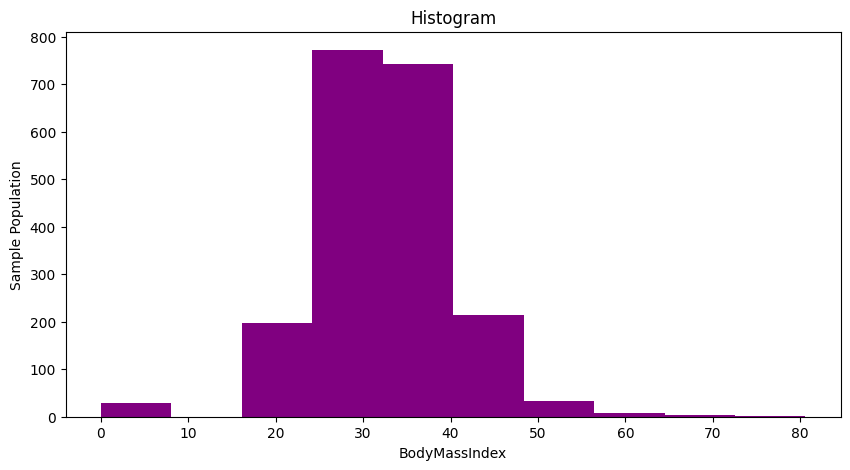

In [36]:
#plot the relationship between body mass index and sample population
plt.figure(figsize= (10, 5))
plt.hist(datasets['BodyMassIndex'], color= 'purple')
plt.xlabel("BodyMassIndex")
plt.ylabel("Sample Population")
plt.title("Histogram")
plt.show()

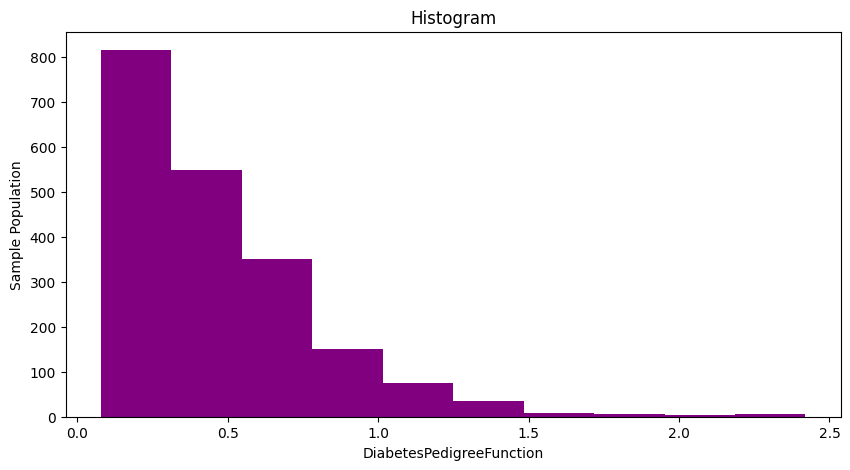

In [37]:
#plot the relationship between diabetes predigree function and sample population
plt.figure(figsize= (10, 5))
plt.hist(datasets['DiabetesPedigreeFunction'], color= 'purple')
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Sample Population")
plt.title("Histogram")
plt.show()

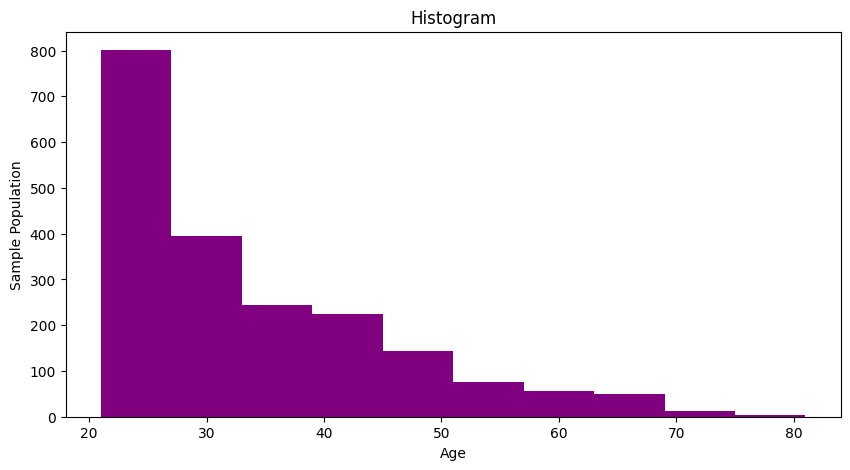

In [38]:
#plot the relationship between age and sample population
plt.figure(figsize= (10, 5))
plt.hist(datasets['Age'], color= 'purple')
plt.xlabel("Age")
plt.ylabel("Sample Population")
plt.title("Histogram")
plt.show()


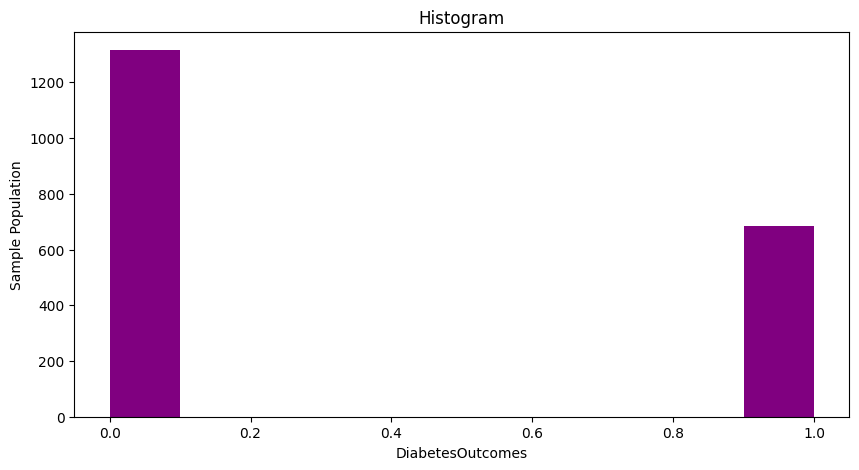

In [39]:
#plot the relationship between diabetes outcomes and sample population
plt.figure(figsize= (10, 5))
plt.hist(datasets['DiabetesOutcomes'], color= 'purple')
plt.xlabel("DiabetesOutcomes")
plt.ylabel("Sample Population")
plt.title("Histogram")
plt.show()

# **MODEL BUILDING**

# Decision Tree
A **decision tree** is a supervised machine learning algorithm mainly used for Regression and Classification. It breaks down a dataset into smaller subsets while at the same time an associated tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision tree can handle both **categorical** and **numerical** data. It is computational efficient to build and the decision rules are easy to understand.



In [40]:
#select all columns except the last for all rows
X=datasets.iloc[:,:-1].values
#select the last columns of all rows
y=datasets.iloc[:, -1].values

print(X.shape)
print('----------------------')
print(y.shape)

(2000, 8)
----------------------
(2000,)


The **split()** function is used to split the data into training and testing set.

The **test size** is set as 0.3 which means that 70% of the dataset is used for training while the remaining 30% is used for testing the model.

In [41]:
#train test split method
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

The **predict()** funtion is used to predict the values of the testing dataset

In [42]:
#predict the values of the X-test dataset
classifier=DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, y_train)
predicted=classifier.predict(X_test)

#print the predicted values
print("\n Predicted values:\n",predicted)


 Predicted values:
 [0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1
 0 0

The **feature** columns are the columns that we try to predict from, and the **target** column is the column with the values we try to predict.

 X is the feature columns, y is the target column.

In [43]:
#separate the feature columns from the target column
features = ['Pregnancies', 'Glucose', 'BloodPressure' ,	'SkinThickness' ,	'Insulin' ,	'BodyMassIndex', 'DiabetesPedigreeFunction' ,	'Age']

#assign X to the feature columns and y to the target column
X = datasets[features]
y = datasets['DiabetesOutcomes']

#print X and y
print(X)
print(y)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0               2      138             62             35        0   
1               0       84             82             31      125   
2               0      145              0              0        0   
3               0      135             68             42      250   
4               1      139             62             41      480   
...           ...      ...            ...            ...      ...   
1995            2       75             64             24       55   
1996            8      179             72             42      130   
1997            6       85             78              0        0   
1998            0      129            110             46      130   
1999            2       81             72             15       76   

      BodyMassIndex  DiabetesPedigreeFunction  Age  
0              33.6                     0.127   47  
1              38.2                     0.233   23  
2           

**DecisionTreeClassifier()** is used to create the decision tree

**ccp_alpha** is parameter used for prunnng when there is overfitting in the decision tree and it has to be set to a value greater than 0 which is the default value

**Pruning** is a technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that provide little power to classify instances

**fit()** is used to fit the X_train, y_train into the decision tree


In [44]:
#create decision tree
clf = tree.DecisionTreeClassifier(ccp_alpha= 0.008)
clf = clf.fit(X_train, y_train)


**plot_tree()** is used to plot decision tree.

The **figsize** is used to change the size of the decision tree in terms of height and width.



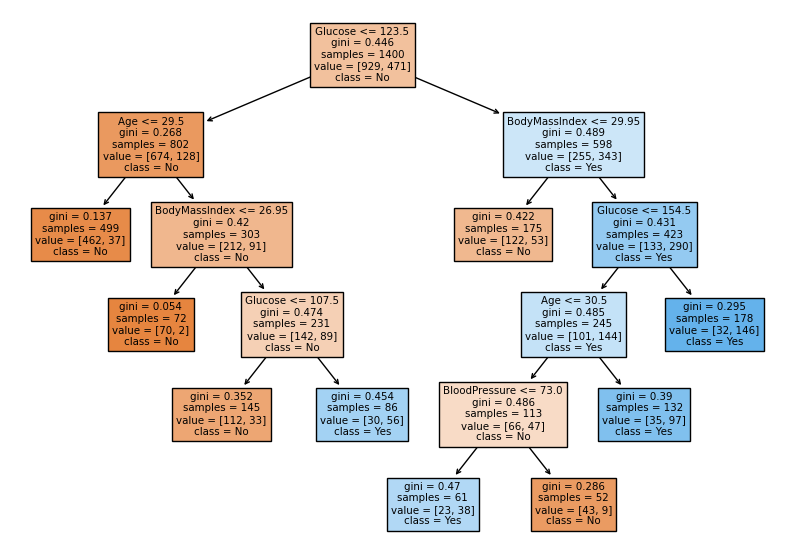

In [45]:
#display decision tree by assigning feature name and class name (replace 0 with NO and 1 with Yes)
fig = plt.figure(figsize= (10,7))
tree.plot_tree(clf, feature_names= features, class_names = {0 : 'No', 1 : 'Yes'}, filled= True);

# Result Explained
**Gini** also known as **gini index**, **gini impurit**y, or **gini coefficient** measures the degree at which the probability of any element of a dataset will be wrongly labelled or classified when selected randomly. It is always a number between 0.0 and 0.5

0.0 indicates only one unique class (pure node) which means all of the samples got the same result.

0.5 indicates the elements are uniformly distributed by splitting in the middle.

1 indicates that all elements are randomly distributed across various classes.

**Sample** shows the number of patients in the decision tree.

**Value** shows division of the numbers patients that got **No** which means patients with no diabetes and the number that got **Yes**  which means patients likely have diabetes.

**Class** is each element of the domain of the classification.




#Predict Value
The **predict()** method is used to predict new values

Predict the value of how likely the patient has diabetes with 3 pregnancies, 120 glucose level, 80mmHg blood pressure, 25mm skin thickness, 140U/mL insulin, 25.5kg/m2 body mass index, 0.345 score of likelihood of diabetes based on family history, 34years of age. 

In [46]:
#predict the value
print(clf.predict([[3, 120, 80, 25, 140, 25.5, 0.345, 34]]))

[0]


#Confusion Matrix
**Confusion Matrix** is a table that is used in classification problems to assess where errors in the model were made.
The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.

Used **Numpy** to generate the numbers for **"actual**" and **"predicted"** values.

In [47]:
#generate the numbers for actual and predicted values
actual = numpy.random.binomial(1, 0.9, size = 1000)
predicted = numpy.random.binomial(1, 0.9, size = 1000)

Use the confusion matrix function on our actual and predicted values

In [48]:
#use the confusion matrix function 
confusion_matrix = metrics.confusion_matrix(actual, predicted)

To create a more interpretable visual display we need to convert the table into a confusion matrix display

In [49]:
#convert table into confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])


To display the plot we can use the functions **plot()** and **show()** from pyplot.

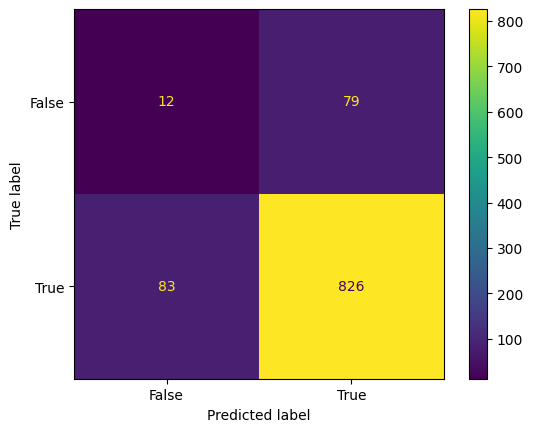

In [50]:
#plot the confusion matrix
cm_display.plot()
plt.show()

# Result of the Confusion Matrix
The Confusion Matrix created has four different quadrants:

**True Negative** (Top-Left Quadrant) 

**False Positive** (Top-Right Quadrant)

**False Negative** (Bottom-Left Quadrant) 

**True Positive** (Bottom-Right Quadrant) 

**True** means that the values were accurately predicted 

**False** means that there was an error or wrong prediction.

# Metrics
The matrix provides us with many useful metrics that help us to evaluate out classification model.
The different measures include: 

**Accuracy**

**Precision**

 **Sensitivity** (Recall)
 
 **Specificity**
 
 **F-score**

# Accuracy
**Accuracy** measures how often the model is correct.

**How to Calculate**

(True Positive + True Negative) / Total Predictions

In [51]:
#calculate accuracy
Accuracy = metrics.accuracy_score(actual, predicted)

# Precision
**Precision** predict what percentage is truly positive from the postive predicted. It does not evaluate the correctly predicted negative cases.

**How to Calculate** 

True Positive / (True Positive + False Positive)


In [52]:
#calculate precision
Precision = metrics.precision_score(actual, predicted)


# Sensitivity (Recall)
**Sensitivity** (sometimes called Recall) measures how good the model is at predicting positives. This means it looks at true positives and false negatives (which are positives that have been incorrectly predicted as negative).

**How to Calculate** 

True Positive / (True Positive + False Negative)

In [53]:
#claculate sensitivity (recall)
Sensitivity_recall = metrics.recall_score(actual, predicted)


# Specificity
**Specificity** is similar to **sensitivity**, but looks at it from the persepctive of negative results. It calculate how well the model is at prediciting negative results

**How to Calculate** 

True Negative / (True Negative + False Positive)

In [54]:
#calculate specificity 
Specificity = metrics.recall_score(actual, predicted, pos_label=0)


# F-score
**F-score** is the **"harmonic mean"** of precision and sensitivity.
It considers both false positive and false negative cases and is good for imbalanced datasets. This score does not take into consideration the True Negative values

**How to Calculate** 

2 * ((Precision * Sensitivity) / (Precision + Sensitivity))



In [55]:
#calculate f-score
F1_score = metrics.f1_score(actual, predicted)

# Combinations of all Metrics
Combine all the calculated metrics result in a line

In [56]:
#print the combined metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.838, 'Precision': 0.912707182320442, 'Sensitivity_recall': 0.9086908690869087, 'Specificity': 0.13186813186813187, 'F1_score': 0.9106945975744212}
